In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import datetime 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False

In [2]:
sleepDf = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/SleepData.csv")
absenceDf = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/AbsenceData.csv")
activeDf = pd.read_csv("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/수면_활동_부재_수집데이터/ActiveData.csv")

In [41]:
hawonDf = sleepDf[sleepDf['userId'] == 0]
jiwonDf = sleepDf[sleepDf['userId'] == 4]

In [5]:
hawonDf.to_excel("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/hawondata.xlsx")
jiwonDf.to_excel("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/jiwondata.xlsx")

In [77]:
#하원, 지원 학생 데이터의 motrolling 열에 mot 표준편차 이동 통계량 계산 값 기입
hawonDf['motrolling'] = hawonDf['mot'].rolling(window=10).std()
jiwonDf['motrolling'] = jiwonDf['mot'].rolling(window=10).std()

#하원, 지원 학생 데이터의 speedrolling 열에 speed 표준편차 이동 통계량 계산 값 기입
hawonDf['speedrolling'] = hawonDf['speed'].rolling(window=10).std()
jiwonDf['speedrolling'] = jiwonDf['speed'].rolling(window=10).std()

#신뢰 가능 여부 값을 기입하는 reliable 열을 1로 초기화(1: 신뢰, 0:비신뢰)
hawonDf['reliable'] = 1

#비신뢰 조건
condition = (hawonDf['hr'] == 0) & (hawonDf['motrolling'] < 0.15) & (hawonDf['speedrolling'] < 0.005)
reliable_count = len(hawonDf[condition])

if reliable_count > 0:
    #비신뢰 조건에 부합하는 행의 reliable 값을 0으로 변경
    hawonDf.loc[condition, 'reliable'] = 0

jiwonDf['reliable'] = 1
condition = (jiwonDf['hr'] == 0) & (jiwonDf['motrolling'] < 0.15) & (jiwonDf['speedrolling'] < 0.005)
reliable_count = len(jiwonDf[condition])

if reliable_count > 0:
    jiwonDf.loc[condition, 'reliable'] = 0

0.09093893630991465
0.1444232602478551


/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_72085/3561913135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hawonDf['motrolling'] = hawonDf['mot'].rolling(window=10).std()
/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_72085/3561913135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jiwonDf['motrolling'] = jiwonDf['mot'].rolling(window=10).std()
/var/folders/3c/mjclf_6d0wlfk3rpvcxcvdz80000gn/T/ipykernel_72085/3561913135.py:3: SettingWithCopyWarning: 
A value is trying to 

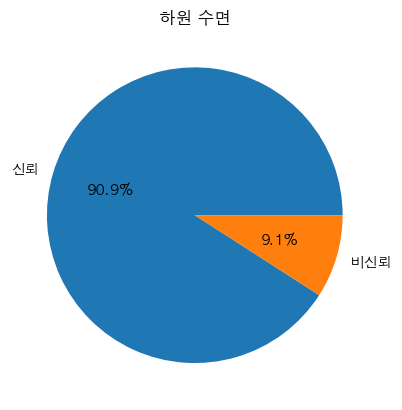

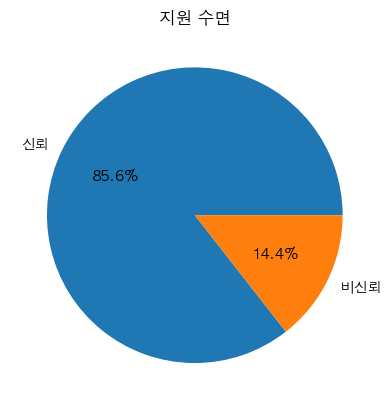

In [78]:
Df = hawonDf
ratio = [len(Df[Df['reliable'] != 0]), len(Df[Df['reliable'] == 0])]
labels = ['신뢰', '비신뢰']
plt.title("하원 수면")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.savefig('/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/하원수면-보정.png')
plt.show()

Df = jiwonDf
ratio = [len(Df[Df['reliable'] != 0]), len(Df[Df['reliable'] == 0])]
labels = ['신뢰', '비신뢰']
plt.title("지원 수면")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.savefig('/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/지원수면-보정png')
plt.show()

In [59]:
hawonDf.to_excel("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/hawondata_modify.xlsx")
jiwonDf.to_excel("/Users/hyennaeon/Desktop/Hatinroo/HatinrooData/jiwondata_modify.xlsx")

,Unnamed: 0,hr,hr_conv,br,br_conv,mot,r,speed,temperature,regdate,...,tvoc,light,d1,d2,d3,dt,status,device_id,userId,motrolling
